In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Weather Station Locations.csv
/kaggle/input/weatherww2/Summary of Weather.csv


In [4]:
#importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
#carregar dados para o dataframe
df_weather=pd.read_csv('../input/weatherww2/Summary of Weather.csv',sep=',', low_memory=False)

In [13]:
#verificar os tipos de dados
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [14]:
#verificar o shape
df_weather.shape

(119040, 31)

In [16]:
#separar os atributos relevantes para o modelo
df_weather_clean = df_weather[['MaxTemp','MinTemp']].copy()

In [18]:
#verificar o shape
df_weather_clean.shape

(119040, 2)

In [17]:
#verificar quantidade  de instancias nulas por atributo
nans = df_weather_clean.isna().sum()
print(nans[nans > 0])

Series([], dtype: int64)


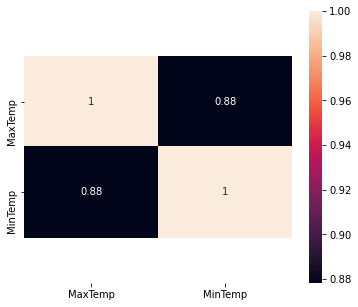

In [19]:
#verificar a correlação entre as temperaturas maxima e minima
plt.figure(figsize=(6,5))
df_corr_ = df_weather_clean.corr()
ax_ = sns.heatmap(df_corr_, annot=True)
bottom, top = ax_.get_ylim()
ax_.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [20]:
#realizar a análise de regressão
x=df_weather_clean['MinTemp'].values #variável independente 
Y=df_weather_clean['MaxTemp'].values #variável dependente

In [21]:
#construir modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #colocar os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) #encontrar os coeficientes (realiza a regressão)

In [22]:
#realizar a previsão
previsao=reg.predict(x_Reshaped)

In [23]:
#análisar a  qualidade do modelo
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)
print ("Capacidade de explicação do modelo (%): ", R_2.round(4) * 100)

Y = [0.91877423]X 10.7005670374616
Coeficiente de Determinação (R2): 0.7715582862315506
Capacidade de explicação do modelo (%):  77.16


In [ ]:
#realiza a plotagem dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()